# Energy consumption of single household with yearly seasonality

In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [635]:
full_data = pd.read_csv("../../data/synthetic/time_series_single_household.csv")
print(len(full_data))

1442


In [636]:
full_data.head(10)

,Index,Time,Energy
0,0,16/12/2006,2.487728
1,1,17/12/2006,1.619929
2,2,18/12/2006,1.313087
3,3,19/12/2006,1.207975
4,4,20/12/2006,1.581628
5,5,21/12/2006,1.169972
6,6,22/12/2006,2.996203
7,7,23/12/2006,2.798056
8,8,24/12/2006,1.318883
9,9,25/12/2006,2.811164


In [637]:
data = full_data.drop(columns=['Index']).copy()

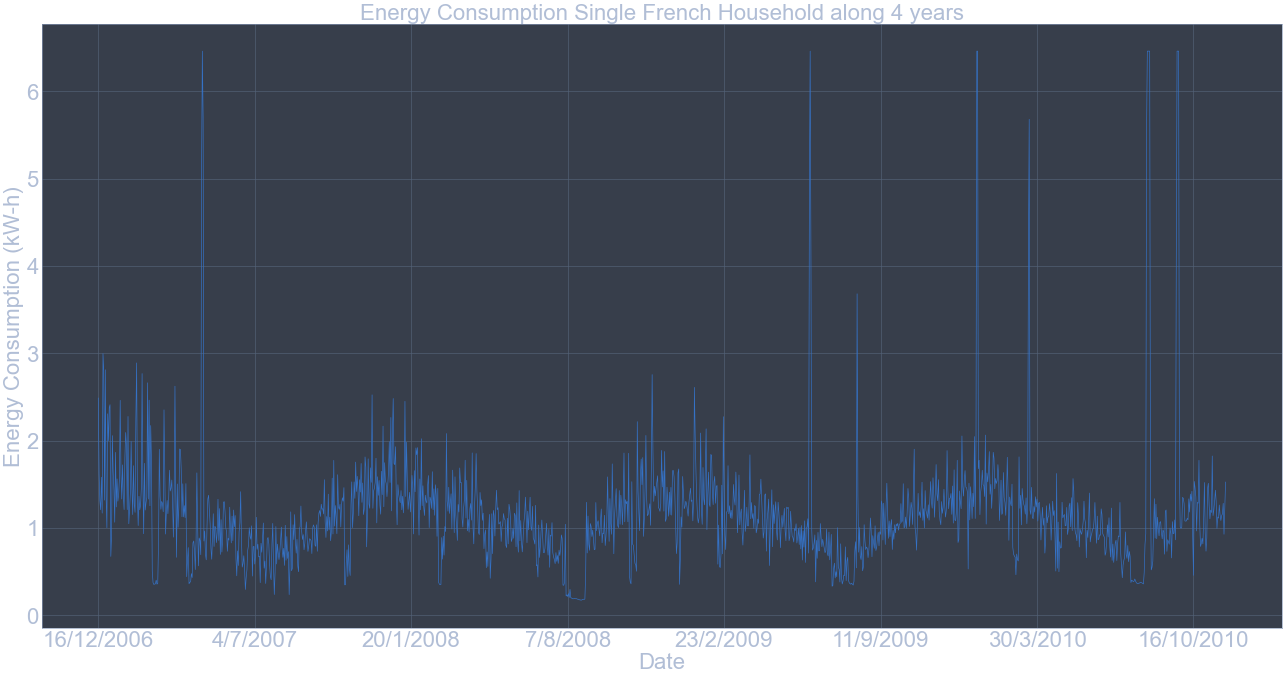

In [638]:
plt.figure(figsize=(40,20), dpi=40)
plt.locator_params(axis='x', nbins=3)
x_ticks = np.arange(0, len(data["Time"]), 200)
plt.xticks(x_ticks)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.plot(data["Time"], data["Energy"])
plt.xlabel("Date", fontsize=40)
plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
plt.title("Energy Consumption Single French Household along 4 years", fontsize=40)
plt.show()

In [639]:
# We observed from the above plot that the trend, seasonality and periodicity can be identified. The irregularity are mostly given by the outliers.

# Rolling Statistics


In [640]:
rollmean = data["Energy"].rolling(window=365).mean()
rollstd = data["Energy"].rolling(window=365).std()

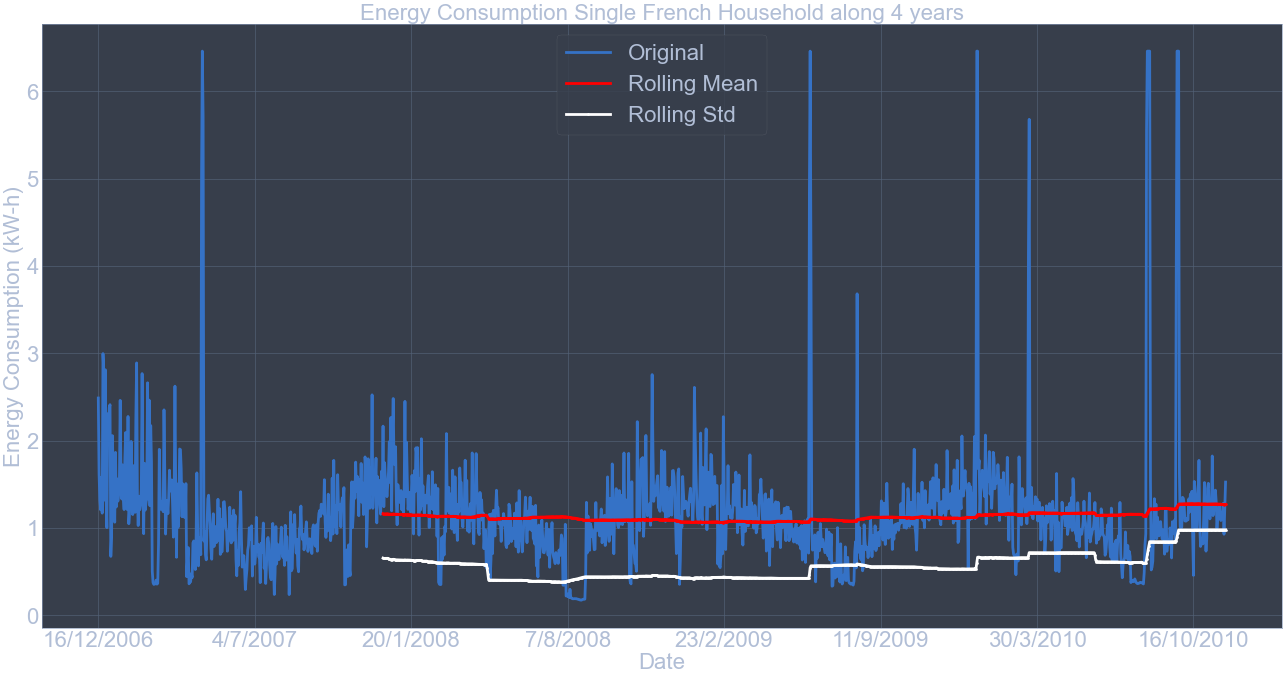

In [641]:
plt.figure(figsize=(40,20), dpi=40)
plt.locator_params(axis='x', nbins=3)
x_ticks = np.arange(0, len(full_data["Time"]), 200)
plt.xticks(x_ticks)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.plot(data["Time"], data["Energy"], label='Original', linewidth='5')
mean = plt.plot(data["Time"], rollmean, '-p', color='red', label='Rolling Mean', linewidth='5')
std = plt.plot(data["Time"], rollstd, '-p', color='white', label='Rolling Std', linewidth='5')
plt.xlabel("Date", fontsize=40)
plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
plt.title("Energy Consumption Single French Household along 4 years", fontsize=40)
plt.legend(loc='best', fontsize=40)
plt.show()

In [642]:
# Also we notice that the data show a stationary behaviour (there is not overall increase or decrease)
# The mean and standard deviation show that there is no significant trend across the yearly seasons

## Outliers treatment

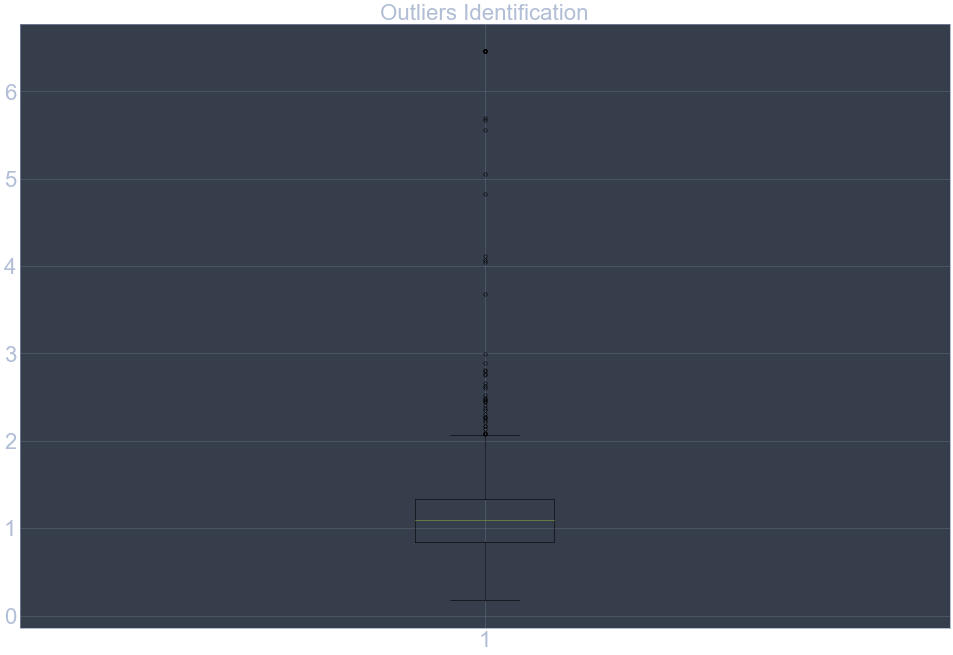

1.1590149882732022


In [643]:
# Find better colors to visualize the boxplot
#plt.title("Outliers Identification", fontsize=40)
plt.figure(figsize=(30,20), dpi=40)
plt.boxplot(data['Energy'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title("Outliers Identification", fontsize=40)
plt.show()
print(data["Energy"].mean())

In [644]:
energy_cutoff = 3.5
# The following condition returns a boolean array and the sum() call adds only the true conditions
outliers_number = (data["Energy"] > max_value).sum()
outliers_density = outliers_number/len(data["Energy"])
print(f"The number of outliers is {outliers_number} and the outliers density is: {outliers_density}")

The number of outliers is 20 and the outliers density is: 0.013869625520110958


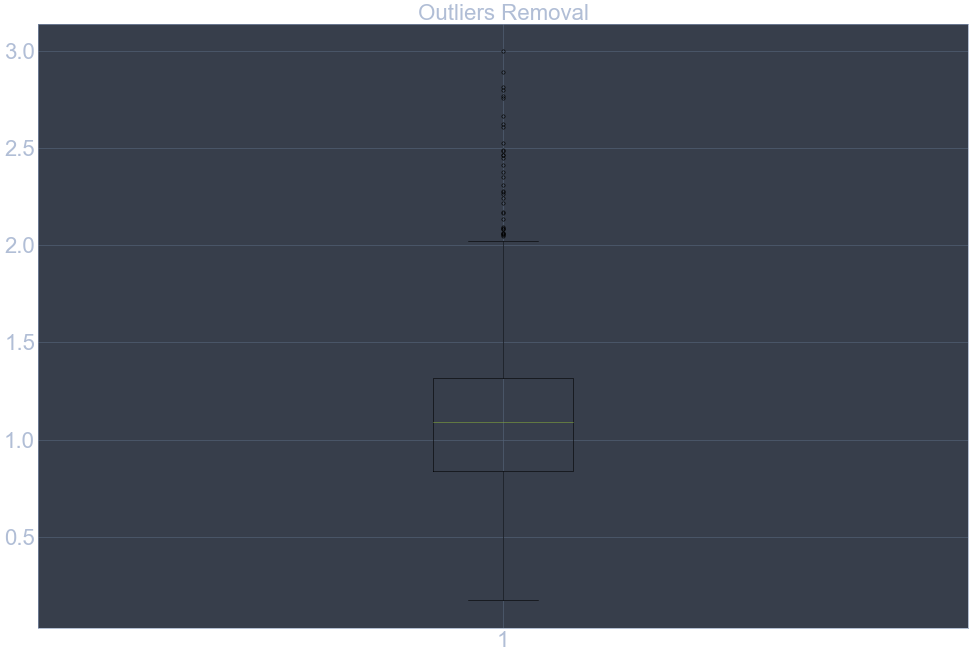

In [645]:
# Outliers removal
data.loc[data.Energy > energy_cutoff, "Energy"] = data["Energy"].mean()
plt.figure(figsize=(30,20), dpi=40)
plt.boxplot(data['Energy'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title("Outliers Removal", fontsize=40)
plt.show()

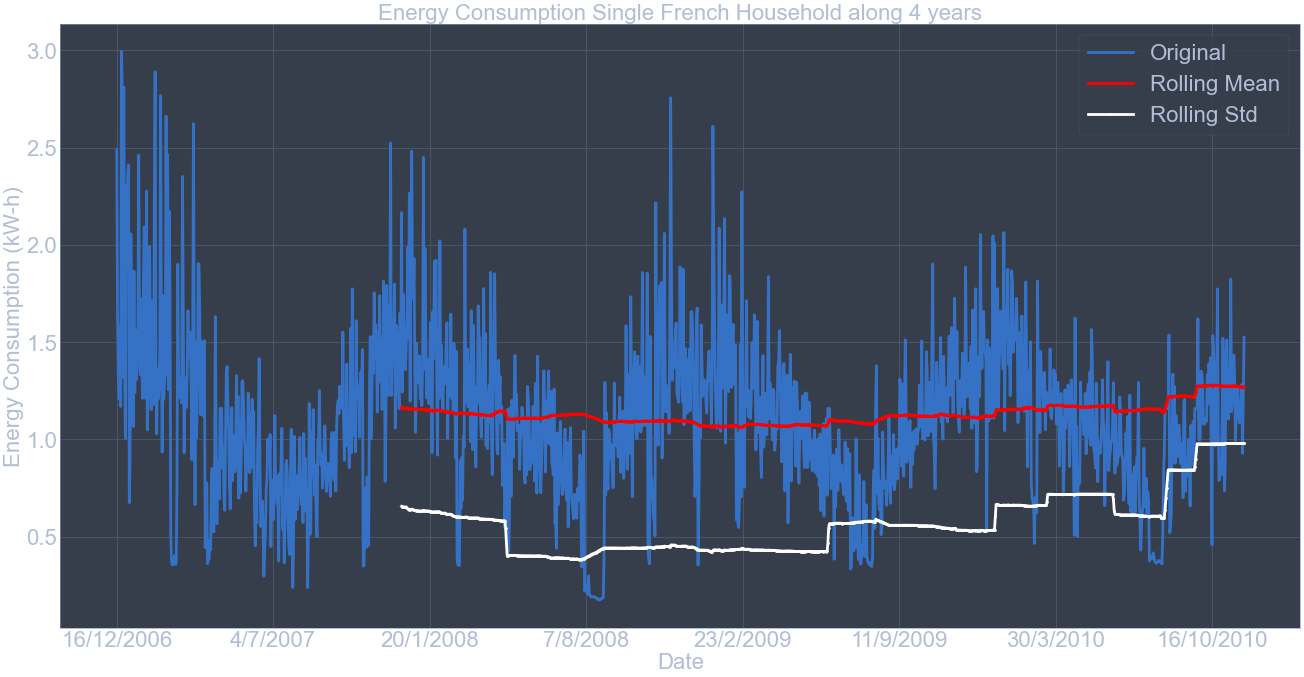

In [646]:
plt.figure(figsize=(40,20), dpi=40)
plt.locator_params(axis='x', nbins=3)
x_ticks = np.arange(0, len(full_data["Time"]), 200)
plt.xticks(x_ticks)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.plot(data["Time"], data["Energy"], label='Original', linewidth='5')
mean = plt.plot(data["Time"], rollmean, '-p', color='red', label='Rolling Mean', linewidth='5')
std = plt.plot(data["Time"], rollstd, '-p', color='white', label='Rolling Std', linewidth='5')
plt.xlabel("Date", fontsize=40)
plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
plt.title("Energy Consumption Single French Household along 4 years", fontsize=40)
plt.legend(loc='best', fontsize=40)
plt.show()

## Normalization

In [675]:
# We will use Standard Scaling because the data is not evenly distributed
scaler = StandardScaler()
# to convert a column from dataframe to a numpy array
energy_values = data.iloc[:,1].values
X = scaler.fit_transform(energy_values.reshape(-1,1))

## Gaussian revision

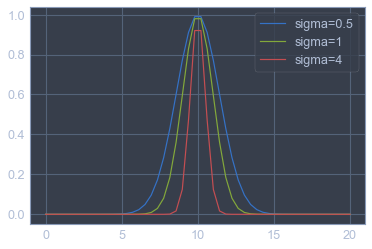

In [676]:
# Here the different values of sigma will play a role of one hyperparameter
gaussianx = np.linspace(0,20)
mu1, sigma1 = 10, 0.5
gaussiany1 = np.exp(-(gaussianx - mu1) ** 2 / 2 * sigma1)
mu2, sigma2 = 10, 1
gaussiany2 = np.exp(-(gaussianx - mu2) ** 2 / 2 * sigma2)
mu3, sigma3 = 10, 4
gaussiany3 = np.exp(-(gaussianx - mu3) ** 2 / 2 * sigma3)
plt.plot(gaussianx, gaussiany1, label="sigma=0.5")
plt.plot(gaussianx, gaussiany2, label="sigma=1")
plt.plot(gaussianx, gaussiany3, label="sigma=4")
plt.legend(loc="best")
plt.show()

In [660]:
# Assumption: every point has the same "gaussian influence" across a single month
# Here we define a monthly importance(decay) factor and the sigma hyperparameter
sigma = s
nm = 12
m = np.zeros(shape=(1,nm))
for i in range(nm):
    m[0,i] = i
    
#XE : XEngineered
XE = np.zeros(shape=(len(X),nm))
Identity = np.ones(shape=(1,nm))
print(len(XE))
for i in range(len(X)):
    XE[i,:] = np.exp(-(X[i] * Identity - m) * (X[i] * Identity - m) / (2 * sigma))
print(XE)

1442
[[2.49887037e-01 5.07095464e-01 8.01423555e-01 ... 1.79973006e-02
  3.84937999e-03 6.41210430e-04]
 [8.21649910e-01 9.91992755e-01 9.32731338e-01 ... 5.52626454e-04
  7.03219289e-05 6.96909298e-06]
 [9.66871346e-01 9.71511802e-01 7.60245488e-01 ... 1.24575567e-04
  1.31931858e-05 1.08816027e-06]
 ...
 [9.80075902e-01 7.82361851e-01 4.86387046e-01 ... 1.59199231e-05
  1.33944948e-06 8.77683810e-08]
 [9.83319871e-01 9.51122367e-01 7.16480465e-01 ... 8.99329195e-05
  9.16848729e-06 7.27952534e-07]
 [8.76375360e-01 9.99905707e-01 8.88493624e-01 ... 3.54372344e-04
  4.26153564e-05 3.99115698e-06]]


# Machine Learning using Linear Regression


## Spliting the data

In [661]:
# for time series we should never split the data randomly! All the test data are the last points to consider
# We have 1442 days, two years will be for training, one year for validation and the rest for test 

In [662]:
Xtrain1 = XE[0:365]
Xtrain2 = XE[365:730]
Xtrain3 = XE[730:1095]
ytrain1 = X[0:365]
ytrain2 = X[365:730]
ytrain3 = X[730:1095]
print("Size of traininig set:" , len(Xtrain),";\tSize of validations set:", len(Xval), ";\tSize of test set: ", len(Xtest))

Size of traininig set: 365 ;	Size of validations set: 365 ;	Size of test set:  347


In [663]:
# From the above we observe that some coefficients have too large values, then we probably will need some regularization techniques

## Regularization using Ridge Regression

In [664]:
# Linear Regression
lr = LinearRegression().fit(Xtrain1, ytrain2)
# Ridge Regression
alpha = 0.01
lrr = Ridge(alpha).fit(Xtrain1, ytrain2)

In [665]:
print("Results from Linear Regression")
print("slope parameters / weight coefficients (lr.coef_):")
print(lr.coef_)
print("intercept parameter / constant term (lr.intercept_):")
print(lr.intercept_)

Results from Linear Regression
slope parameters / weight coefficients (lr.coef_):
[[-5.42141006e+03  4.95052820e+04 -2.59652274e+05  1.02771850e+06
  -3.40579648e+06  9.91449093e+06 -2.58572442e+07  6.03950555e+07
  -1.23787160e+08  2.12041924e+08 -2.73261412e+08  2.00795002e+08]]
intercept parameter / constant term (lr.intercept_):
[9.9167148]


In [666]:
print("Results from Ridge Regression")
print("slope parameters / weight coefficients (lrr.coef_):")
print(lrr.coef_)
print("intercept parameter / constant term (lrr.intercept_):")
print(lrr.intercept_)

Results from Ridge Regression
slope parameters / weight coefficients (lrr.coef_):
[[-3.85784643  3.51036003  2.17102641 -2.17097619 -1.69185681  1.28826402
   2.03887485  0.83250086 -0.14722385 -0.32114809 -0.17565209 -0.05786727]]
intercept parameter / constant term (lrr.intercept_):
[0.26092028]


In [667]:
print("Scores for Linear Regression")
print("Training set score: {:.2f}".format(lr.score(Xtrain1, ytrain2)))
print("Test set score: {:.2f}".format(lr.score(Xtrain2, ytrain3)))

print("Scores for Ridge Regression")
print("Training set score: {:.2f}".format(lrr.score(Xtrain1, ytrain2)))
print("Test set score: {:.2f}".format(lrr.score(Xtrain2, ytrain3)))

Scores for Linear Regression
Training set score: 0.32
Test set score: 0.09
Scores for Ridge Regression
Training set score: 0.30
Test set score: 0.18


# Results Visualization 

In [671]:
y_valpredict = lrr.predict(Xval)
y_toplot = scaler.inverse_transform(y_valpredict)

In [672]:
size = len(Xtrain) + len(Xval)
xreal_values = data.iloc[0:size,0].values
yreal = np.concatenate((ytrain, yval))
print(len(data["Time"][0:size]), len(yreal))

730 730


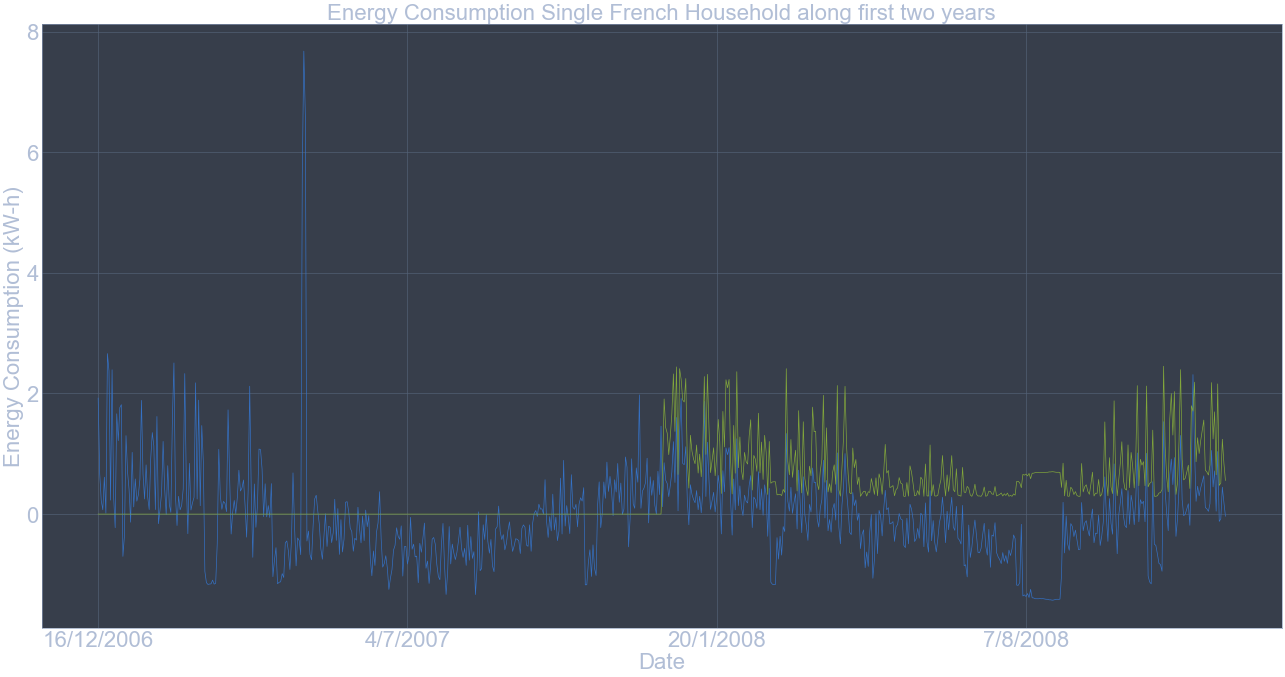

In [674]:
plt.figure(figsize=(40,20), dpi=40)
plt.locator_params(axis='x', nbins=3)
x_ticks = np.arange(0, len(Xtrain) + len(Xval), 200)
plt.xticks(x_ticks)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
size = len(Xtrain) + len(Xval)
yreal = np.concatenate((ytrain, yval))
xreal_values = data.iloc[0:size,0].values
plt.plot(xreal_values, yreal)
ypred= lrr.predict(Xval)
ynull = np.zeros(len(ytrain))
ypredicted = np.concatenate((ynull.reshape(-1,1), y_toplot))
plt.plot(xreal_values, ypredicted)
plt.xlabel("Date", fontsize=40)
plt.ylabel("Energy Consumption (kW-h)", fontsize=40)
plt.title("Energy Consumption Single French Household along first two years", fontsize=40)
plt.show()

# Conclusion
- So far we have that using Linear Regression method without regularization we are not able to predict accurately
- Using Linear Regression with Ridge regularization is so far not improving the situation
- Conventional methods need to be implemented instead of this particular feature engineering attempt